In [1]:
# Data manipulation
import numpy as np
import pandas as pd
import time
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from statsmodels.tools.eval_measures import rmse
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pre-processing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing.data import QuantileTransformer
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA

# Model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import LeaveOneOut 

# Metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import classification_report

# Display in Jupyter
from IPython.display import display, HTML

# Display settings
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 100)

/Users/filipetheodoro/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Carregar base de dados
location = "/Users/filipetheodoro/Downloads/orange_small_train/orange_small_train.data"
df_train = pd.read_csv(location, header=None, delimiter="\t", low_memory=False)

# location = "/Users/filipetheodoro/Downloads/orange_small_test/orange_small_test.data"
# df_test = pd.read_csv(location, header=None, delimiter="\t", low_memory=False)

location = "/Users/filipetheodoro/Downloads/orange_small_train_churn.labels"
churn = pd.read_csv(location, header=None, delimiter="\n", low_memory=False)
churn.columns = ["churn"]
location = "/Users/filipetheodoro/Downloads/orange_small_train_upselling.labels.txt"
upselling = pd.read_csv(location, header=None, delimiter="\n", low_memory=False)
upselling.columns = ["upselling"]
location = "/Users/filipetheodoro/Downloads/orange_small_train_appetency.labels.txt"
appetency = pd.read_csv(location, header=None, delimiter="\n", low_memory=False)
appetency.columns = ["appetency"]

In [5]:
print("Quantidade de informações sobre uma entrada: {}".format(df_train.shape[1]))

Quantidade de informações sobre uma entrada: 230


## EDA - Exploraçao e Analise dos Dados

- Sempre que um modelo de previsão for construído primeiro é necessário observar e analisar quais dados trarão o melhor resultado. Normalmente em um base de dados possuimos vários pontos de informação, nesse caso por exemplo possuimos um total de 230 pontos. Acontece que nem sempre todos esses pontos são úteis para o que vamos prever, pois alem de aumentar a complexidade do modelo, não traz nenhum aumento de precisão.

- É por isso que o primeiro passo é selecionar quais desses pontos iremos utilizar para construir o modelo. 

- Eliminamos aqueles que são redundantes, que é feito pela analise da correlação entre os dados.

- Mantemos aqueles que estão presentes na maioria das entradas.

- Eliminamos pontos que são únicos, como por exemplo nome da pessoa ou endereço.

- Fazendo essa limpeza deixamos nosso modelo mais eficiente, pois menos dados precisam ser computados.

In [6]:
print(churn.churn.value_counts())
print(upselling.upselling.value_counts())
print(appetency.appetency.value_counts())
# Como podemos ver a base de dados esta desbalanceada, isso pode causar Overfitting

-1    46328
 1     3672
Name: churn, dtype: int64
-1    46318
 1     3682
Name: upselling, dtype: int64
-1    49110
 1      890
Name: appetency, dtype: int64


In [7]:
# Definir nome das colunas
name_headder = df_train.iloc[0]

df_train = df_train[1:]
df_train.columns = name_headder

In [8]:
# Define o tipo das variaveis
cat_columns = df_train.columns[-40:]
num_columns = df_train.columns[:-40]

df_train[num_columns] = df_train[num_columns].astype(float)
df_train[cat_columns] = df_train[cat_columns].astype('category')

In [9]:
# Deletar colunas com muitos valores nulos pois elas não trazem beneficios para a criaçao dos modelos
df_train = df_train.dropna(axis=1, thresh=10000)
print(df_train.shape)

num_columns = df_train.columns[(df_train.dtypes.values == np.dtype('float64'))]
cat_columns = df_train.columns[(df_train.dtypes.values != np.dtype('float64'))]

(50000, 76)


In [10]:
# Substituis valores NaN por 0
df_train = df_train.replace(np.nan, 0)
df_train.head()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189,Var192,Var193,Var194,Var195,Var196,Var197,Var198,Var199,Var200,Var201,Var202,Var203,Var204,Var205,Var206,Var207,Var208,Var210,Var211,Var212,Var214,Var216,Var217,Var218,Var219,Var220,Var221,Var222,Var223,Var225,Var226,Var227,Var228,Var229
1,1526.0,7.0,184.0,464.0,580.0,14.0,128.0,166.56,0.0,3570.0,0.0,4.076907,9.0,0.0,36.0,35.0,1350864.0,0.0,7333.11,5.0,12.0,0.0,104.0,168.0,117625.60,1175.0,6.0,720.0,8.0,0.0,1212385.0,69134.0,185.0,0.0,9.0,397579.0,1812252.0,142.0,38418.0,0.0,0.0,462.0,bZkvyxLkBI,RO12,0,taul,1K8T,lK27,ka_ns41,nQUveAzAF7,0,0,dXGu,9_Y1,FbIm,VpdQ,haYg,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,0,XTbPUYD,sH5Z,cJvF,FzaX,1YVfGrO,oslk,fXVEsaq,jySVZNlOJy,0,xb3V,RAYp,F2FyR07IdsN7I,0
2,525.0,0.0,0.0,168.0,210.0,2.0,24.0,353.52,0.0,4764966.0,0.0,5.408032,9.0,3.0,26.0,0.0,2872928.0,3.0,151098.90,25.0,2.0,58158.0,40.0,40.0,-356411.60,590.0,72.0,0.0,0.0,8.0,4136430.0,357038.0,0.0,0.0,9.0,278334.0,10439160.0,32.0,238572.0,0.0,0.0,0.0,CEat0G8rTN,RO12,0,taul,1K8T,2Ix5,qEdASpP,y2LIM01bE1,0,0,lg1t,9_Y1,k13i,sJzTlal,zm5i,me75fM6ugJ,kIsH,uKAI,L84s,NhsEn4L,0,kZJyVg2,0,0,FzaX,0AJo2f2,oslk,2Kb5FSF,LM8l689qOp,0,fKCe,RAYp,F2FyR07IdsN7I,0
3,5236.0,7.0,904.0,1212.0,1515.0,26.0,816.0,220.08,0.0,5883894.0,0.0,6.599658,9.0,0.0,130.0,518.0,1675776.0,0.0,16211.58,40.0,58.0,0.0,312.0,336.0,405104.00,3230.0,114.0,5967.0,-28.0,0.0,3478905.0,248932.0,800.0,0.0,36.0,320565.0,9826360.0,206.0,434946.0,0.0,0.0,0.0,eOQt0GoOh3,AERks4l,SEuy,taul,1K8T,ffXs,NldASpP,y4g9XoZ,vynJTq9,smXZ,4bTR,9_Y1,MGOA,VpdQ,haYg,DHn_WUyBhW_whjA88g9bvA64_,kIsH,uKAI,L84s,UbxQ8lZ,TTGHfSv,pMWAe2U,bHR7,UYBR,FzaX,JFM1BiF,Al6ZaUT,NKv4yOc,jySVZNlOJy,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.08,0.0,0.0,0.0,1.988250,9.0,0.0,12.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,-275703.60,0.0,0.0,0.0,-14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jg69tYsGvO,RO12,0,taul,1K8T,ssAy,_ybO0dd,4hMlgkf58mhwh,0,0,W8mQ,9_Y1,YULl,VpdQ,0,me75fM6ugJ,kIsH,uKAI,Mtgm,NhsEn4L,0,kq0dQfu,eKej,UYBR,FzaX,L91KIiz,oslk,CE7uk3u,LM8l689qOp,0,FSa2,RAYp,F2FyR07IdsN7I,0
5,1029.0,7.0,3216.0,64.0,80.0,4.0,64.0,200.00,0.0,0.0,0.0,4.552446,18.0,3.0,82.0,224.0,784448.0,0.0,37423.50,0.0,0.0,89754.0,32.0,56.0,10714.84,215.0,0.0,15111.0,58.0,0.0,150650.0,66046.0,3255.0,0.0,9.0,267162.0,644836.0,2.0,0.0,0.0,0.0,0.0,IXSgUHShse,RO12,SEuy,taul,1K8T,uNkU,EKR938I,ThrHXVS,0v21jmy,smXZ,xklU,9_Y1,RVjC,sJzTlal,6JmL,me75fM6ugJ,kIsH,uKAI,L84s,XfqtO3UdzaXh_,SJs3duv,11p4mKe,H3p7,UYBR,FzaX,OrnLfvc,oslk,1J2cvxe,LM8l689qOp,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86


In [11]:
# Estatisticas sobre a base de dados
df_train.describe()

,Var6,Var7,Var13,Var21,Var22,Var24,Var25,Var28,Var35,Var38,Var44,Var57,Var65,Var72,Var73,Var74,Var76,Var78,Var81,Var83,Var85,Var94,Var109,Var112,Var113,Var119,Var123,Var125,Var126,Var132,Var133,Var134,Var140,Var143,Var144,Var149,Var153,Var160,Var163,Var173,Var181,Var189
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.00000,5.000000e+04,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,5.000000e+04,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000
mean,1179.759700,6.05514,1111.247920,208.585200,261.168600,3.856080,87.126880,202.007511,0.645000,2.320732e+06,0.150120,3.512311,13.221720,2.314920,66.64108,92.174880,1.340870e+06,0.481140,9.168502e+04,18.017600,7.613400,5.450590e+04,52.084160,59.587040,-1.532786e+05,814.808500,54.15840,2.479823e+04,-0.399680,3.171520,2.045805e+06,3.935276e+05,1228.243700,0.052200,10.430820,2.522753e+05,5.562658e+06,34.915720,4.373827e+05,0.006160,0.550200,113.578560
std,2566.782817,6.33667,2664.622305,538.420836,673.928257,9.318793,205.367702,115.233463,2.850112,2.958460e+06,1.546387,2.025882,10.635212,2.697512,52.85917,723.728349,1.814417e+06,2.031927,1.053092e+05,83.814388,19.724604,1.429368e+05,132.381646,150.849127,7.613730e+05,2062.308021,210.93627,8.543910e+04,19.141885,9.539891,2.411842e+06,5.881166e+05,3787.875862,0.610248,11.649139,6.163372e+05,4.523657e+06,95.098069,8.183401e+05,0.125707,2.374479,144.718679
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,-66.880000,0.000000,0.000000e+00,0.000000,0.000214,0.000000,0.000000,4.00000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-9.803600e+06,0.000000,0.00000,0.000000e+00,-32.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,287.000000,0.00000,0.000000,60.000000,75.000000,0.000000,8.000000,166.560000,0.000000,0.000000e+00,0.000000,1.743164,9.000000,0.000000,24.00000,0.000000,4.784000e+03,0.000000,7.951260e+03,0.000000,0.000000,0.000000e+00,16.000000,8.000000,-1.827148e+05,300.000000,0.00000,0.000000e+00,-18.000000,0.000000,7.725250e+04,2.952000e+03,0.000000,0.000000,0.000000,0.000000e+00,4.685830e+05,4.000000,0.000000e+00,0.000000,0.000000,0.000000
50%,798.000000,7.00000,132.000000,136.000000,170.000000,2.000000,40.000000,200.000000,0.000000,5.807610e+05,0.000000,3.514741,9.000000,3.000000,52.00000,0.000000,6.466880e+05,0.000000,5.347995e+04,5.000000,4.000000,1.071000e+03,32.000000,32.000000,2.961542e+04,530.000000,24.00000,3.906000e+03,0.000000,0.000000,1.083720e+06,1.560420e+05,120.000000,0.000000,9.000000,9.898000e+03,5.948800e+06,20.000000,8.107800e+04,0.000000,0.000000,0.000000
75%,1316.000000,7.00000,1264.000000,212.000000,265.000000,4.000000,104.000000,256.960000,0.000000,4.241100e+06,0.000000,5.264741,18.000000,3.000000,102.00000,70.000000,2.073600e+06,0.000000,1.705393e+05,20.000000,8.000000,5.114100e+04,56.000000,64.000000,1.474875e+05,825.000000,66.00000,2.659725e+04,4.000000,0.000000,3.372682e+06,5.491260e+05,1105.000000,0.000000,18.000000,3.067312e+05,1.033293e+07,38.000000,5.254020e+05,0.000000,0.000000,246.000000
max,131761.000000,140.00000,197872.000000,36272.000000,45340.000000,494.000000,13168.000000,5158.560000,110.000000,1.884690e+07,135.000000,7.000000,180.000000,24.000000,264.00000,142156.000000,1.935360e+07,39.000000,1.814403e+06,6335.000000,1178.000000,5.640330e+06,7456.000000,10352.000000,9.932480e+06,105060.000000,13086.00000,5.436045e+06,68.000000,184.000000,1.500990e+07,5.735340e+06,520545.000000,18.000000,81.000000,1.693440e+07,1.390780e+07,4862.000000,1.451520e+07,6.000000,49.000000,642.000000

In [12]:
# Quantidade de valores unicos 
# caso seja muito grande pode não ajudar na separaçao das classes alem de aumentar a complexidade do modelo
# e portanto deve ser descartado
df_train[cat_columns].nunique()

0
Var192      362
Var193       51
Var194        4
Var195       23
Var196        4
Var197      226
Var198     4291
Var199     5074
Var200    15416
Var201        3
Var202     5714
Var203        6
Var204      100
Var205        4
Var206       22
Var207       14
Var208        3
Var210        6
Var211        2
Var212       81
Var214    15416
Var216     2016
Var217    13991
Var218        3
Var219       23
Var220     4291
Var221        7
Var222     4291
Var223        5
Var225        4
Var226       23
Var227        7
Var228       30
Var229        5
dtype: int64

In [13]:
# Deleta colunas com muitos valores não unicos
cat_columns = df_train[cat_columns].columns[(df_train[cat_columns].nunique() < 500)]

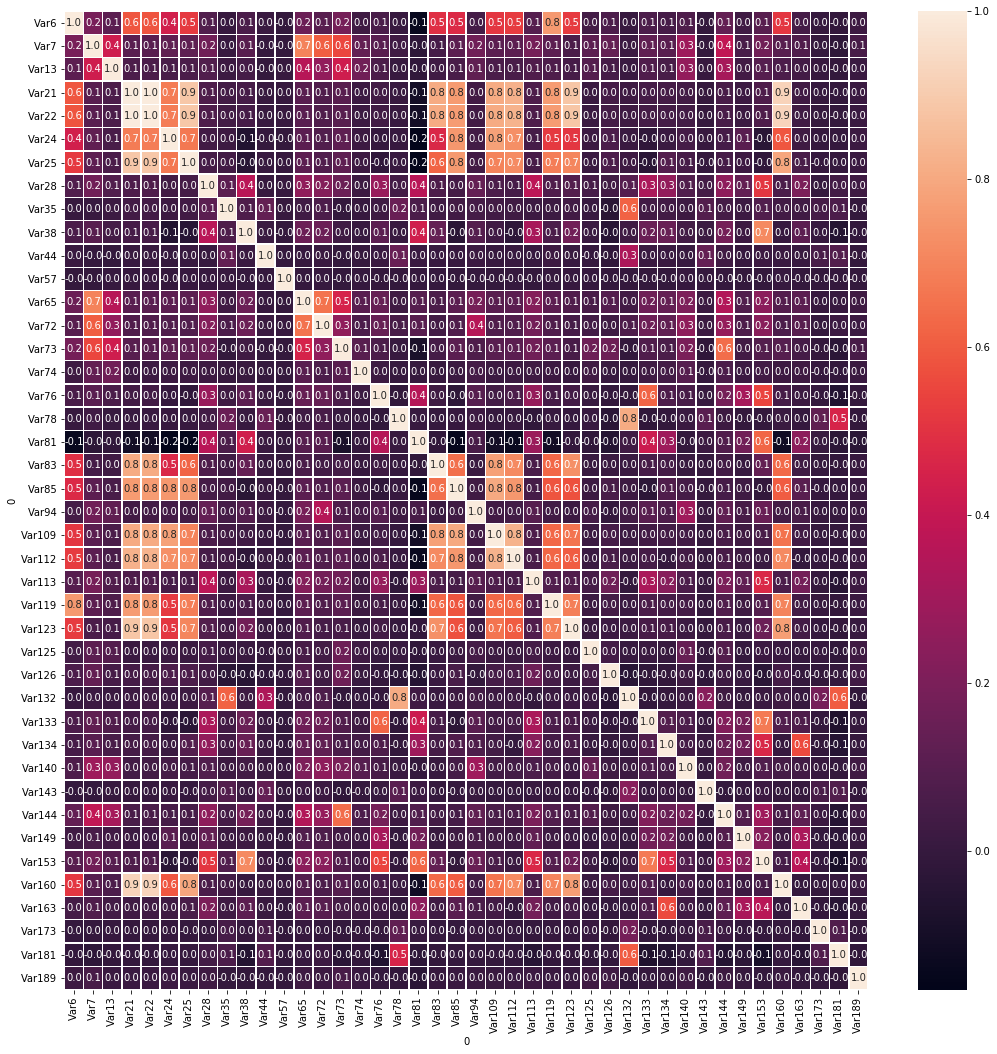

In [14]:
# Visualizacao dos dados
# Mapa de correlaçao dos dados numericos
# Nesse passo podemos reduzir o numero de variáveis sem afetar a precisão do modelo
data = df_train[num_columns]
f, ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [15]:
# Podemos eliminar algumas colunas já que elas sao correlatas, isso diminui a complexidade do modelo,
# o deixando mais rápido sem ter perdas
# Quando duas ou mais colunas são correlatas quer dizer que quando uma aumenta a outra também aumenta.
df_corr = pd.DataFrame()
corr_list =[]
for i in range(len(num_columns)):
    feature1 = df_train[num_columns[i]]
    feature1_name = num_columns[i]
    
    for j in range(len(num_columns)):
        feature2 = df_train[num_columns[j]]
        feature2_name = num_columns[j]
        
        corr = np.corrcoef(feature1, feature2)[0][1]
        
        corr_list.append([feature1_name, feature2_name, corr])
    
df_corr = pd.DataFrame(data=corr_list, columns=['feature1', 'feature2', 'corr'])

# Remover diagonal principal 
df_corr_diag_rm = df_corr.loc[~(df_corr['feature1'] == df_corr['feature2'])]

# Colunas com correlaçao maior que 90%
df_corr_diag_rm_thres = df_corr_diag_rm.loc[(df_corr_diag_rm['corr'] > .9)].sort_values(['corr'], ascending=[0])

df_corr_diag_rm_thres.sort_values(['feature1', 'corr'], ascending=[1, 0])

,feature1,feature2,corr
1558,Var160,Var22,0.928411
1557,Var160,Var21,0.926336
130,Var21,Var22,0.998410
163,Var21,Var160,0.926336
171,Var22,Var21,0.998410
205,Var22,Var160,0.928411


In [16]:
# Como as 3 colunas estao altamente correlacionadas, descartarei 2
num_columns = num_columns.difference(["Var21", "Var22"])

In [17]:
# Colunas que serao usadas para a criaçao do modelo
columns = num_columns.append(cat_columns)
df_train = df_train[columns]
columns

Index(['Var109', 'Var112', 'Var113', 'Var119', 'Var123', 'Var125', 'Var126',
       'Var13', 'Var132', 'Var133', 'Var134', 'Var140', 'Var143', 'Var144',
       'Var149', 'Var153', 'Var160', 'Var163', 'Var173', 'Var181', 'Var189',
       'Var24', 'Var25', 'Var28', 'Var35', 'Var38', 'Var44', 'Var57', 'Var6',
       'Var65', 'Var7', 'Var72', 'Var73', 'Var74', 'Var76', 'Var78', 'Var81',
       'Var83', 'Var85', 'Var94', 'Var192', 'Var193', 'Var194', 'Var195',
       'Var196', 'Var197', 'Var201', 'Var203', 'Var204', 'Var205', 'Var206',
       'Var207', 'Var208', 'Var210', 'Var211', 'Var212', 'Var218', 'Var219',
       'Var221', 'Var223', 'Var225', 'Var226', 'Var227', 'Var228', 'Var229'],
      dtype='object', name=0)

In [18]:
# Transforma valores das categorias em numeros, caso contrario nao pode ser adicionada ao modelo
# como o valor numerico é simbolico apensa, nao afeta em nada a precisao do modelo
for col in cat_columns:
    df_train[col] = df_train[col].astype('category').cat.codes


# Treinando o modelo RandomForestTree

- Para esse problema vou utilizar a arvore de decisao Random Forest pois como possuimos variaveis que sao categoricas ele se comporta melhor por nao trabalhar com distancia entre pontos.

- Para treinar o modelo vou usar 70% da base de dados, e o restante será usado para testar o modelo.

- Com a base de dados já selecionada basta agora treinar o modelo, e caso seja necessário podemos adicionar ou remover variaveis

- Como a base de dados nao esta bem dividida ela vai apresentar o fenômeno Overfitting, que consiste do modelo ser muito preciso para dados conhecido, diferente do que acontece com dados novos onde a precisao vai ser menor.

- Utilizando esse tipo de modelo conseguimos saber qual variavel mais afeta na hora da decisao, que pode ser visualizado no grafico de barras.

- Por nao utlizar a distância entre pontos não é necessário normalizar os valores

- A matriz de confusao nos mostra qual o desempenho do modelo em prever as duas classes, onde a diagonal principal nos mostra quando o modelo previu corretamente.

- O processo de treinar e analisar os resultados do modelo será o mesmo para os 3 atributos que desejamos prever [Churn, Upselling, Appetency]

- +1 se refere a verdadeiro, enquanto -1 refere a falso. Ou seja, se o resultado para a previsão de Churn der +1 quer dizer que ele tem uma tendência a cancelar a conta.

## Churn - Tendencia de cancelar a conta

In [19]:
# Dividir a base de dados em 70% para treinar o model e 30% para testa-lo
x_train, x_test, y_train, y_test = train_test_split(df_train, churn, test_size=0.3, random_state=4)

In [20]:
# criar modelo usando random forest classifier
# como o modelo esta desbalanceado, a classe com menos ocorrencias deve ter um peso maior
clf_rf = RandomForestClassifier(n_estimators=500, random_state=43, class_weight="balanced")
# Treina o modelo
clr_rf = clf_rf.fit(x_train,y_train)
# Prever os valores
y_pred = clf_rf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Precisão do modelo: ',ac*100)

/Users/filipetheodoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Precisão do modelo:  92.67333333333333


Text(0.5,1,'Churn Confusion Matrix')

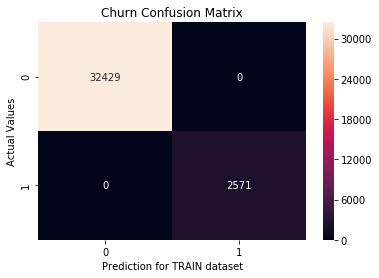

In [21]:
cm = confusion_matrix(y_train,clf_rf.predict(x_train))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Prediction for TRAIN dataset')
plt.ylabel('Actual Values')
plt.title('Churn Confusion Matrix')

Text(0.5,1,'Churn Confusion Matrix')

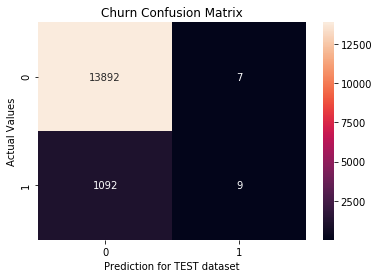

In [22]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Prediction for TEST dataset')
plt.ylabel('Actual Values')
plt.title('Churn Confusion Matrix')

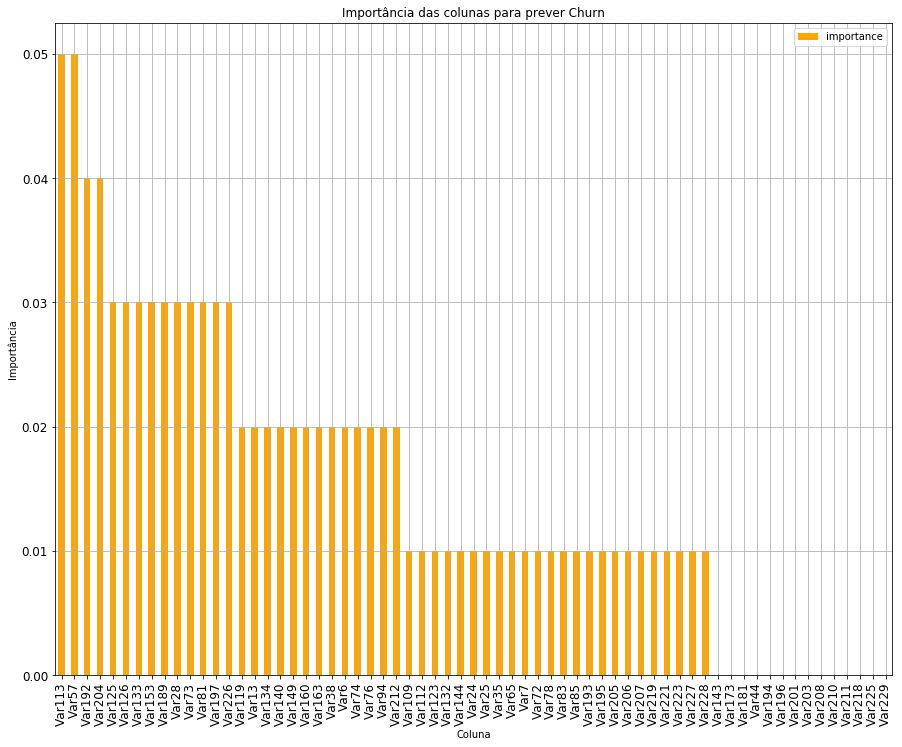

In [22]:
# Analisar a importancia de cada variável na decisao da arvore
importances = list(clf_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(15,12),
        title= 'Importância das colunas para prever Churn',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Coluna")

# Set the y-axis label
ax.set_ylabel("Importância");

In [23]:
# ROC Curve Metrics
predictions_prob = clf_rf.predict_proba(x_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, predictions_prob, pos_label = 1)
auc_r = auc(fpr2, tpr2)
print("Valor AUC do modelo Churn: {}".format(auc_r*100))

Valor AUC do modelo Churn: 69.38873404793462


## Upselling - propensão para comprar upgrades ou adicionais quando apresentados

In [24]:
# Dividir a base de dados em 70% para treinar o model e 30% para testa-lo
x_train, x_test, y_train, y_test = train_test_split(df_train, upselling, test_size=0.3, random_state=4)

In [25]:
# criar modelo usando random forest classifier
# como o modelo esta desbalanceado, a classe com menos ocorrencias deve ter um peso maior
clf_rf = RandomForestClassifier(n_estimators=500, random_state=43, class_weight="balanced")
# Treina o modelo
clr_rf = clf_rf.fit(x_train,y_train)
# Prever os valores
y_pred = clf_rf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Precisão do modelo: ',ac*100)

/Users/filipetheodoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Precisão do modelo:  94.82666666666667


Text(0.5,1,'Upselling Confusion Matrix ')

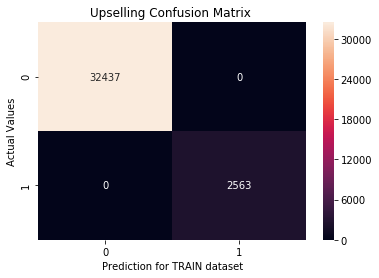

In [26]:
cm = confusion_matrix(y_train,clf_rf.predict(x_train))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Prediction for TRAIN dataset')
plt.ylabel('Actual Values')
plt.title('Upselling Confusion Matrix ')

Text(0.5,1,'Upselling Confusion Matrix')

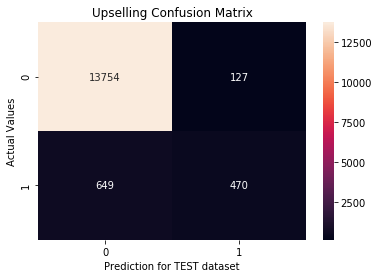

In [27]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Prediction for TEST dataset')
plt.ylabel('Actual Values')
plt.title('Upselling Confusion Matrix')

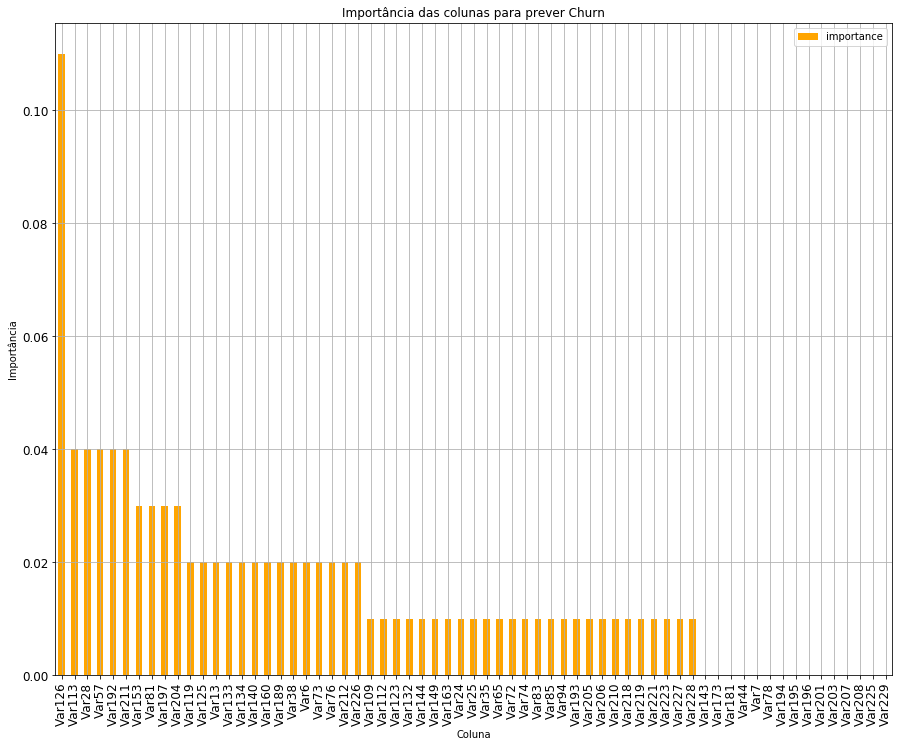

In [28]:
# Analisar a importancia de cada variável na decisao da arvore
importances = list(clf_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(15,12),
        title= 'Importância das colunas para prever Upselling',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Coluna")

# Set the y-axis label
ax.set_ylabel("Importância");

In [28]:
# ROC Curve Metrics
predictions_prob = clf_rf.predict_proba(x_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, predictions_prob, pos_label = 1)
auc_r = auc(fpr2, tpr2)
print("Valor AUC do modelo Upselling: {}".format(auc_r*100))

Valor AUC do modelo Upselling: 83.19995462516543


## Appetency - tendencia de usar novos produtos e serviços

In [29]:
# Dividir a base de dados em 70% para treinar o model e 30% para testa-lo
x_train, x_test, y_train, y_test = train_test_split(df_train, appetency, test_size=0.3, random_state=4)

In [34]:
# criar modelo usando random forest classifier
# como o modelo esta desbalanceado, a classe com menos ocorrencias deve ter um peso maior
clf_rf = RandomForestClassifier(n_estimators=500, random_state=43, class_weight="balanced")
# Treina o modelo
clr_rf = clf_rf.fit(x_train,y_train)
# Prever os valores
y_pred = clf_rf.predict(x_test)
ac = accuracy_score(y_test, y_pred)
print('Precisão do modelo: ',ac*100)

/Users/filipetheodoro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Precisão do modelo:  98.20666666666666


Text(0.5,1,'Appetency Confusion Matrix ')

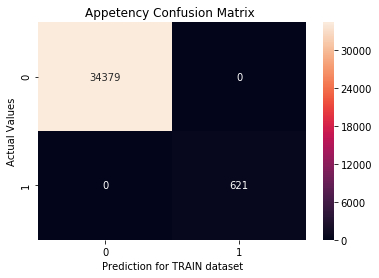

In [32]:
cm = confusion_matrix(y_train,clf_rf.predict(x_train))
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Prediction for TRAIN dataset')
plt.ylabel('Actual Values')
plt.title('Appetency Confusion Matrix ')

Text(0.5,1,'Appetency Confusion Matrix')

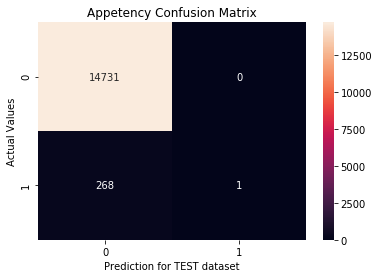

In [33]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d")
plt.xlabel('Prediction for TEST dataset')
plt.ylabel('Actual Values')
plt.title('Appetency Confusion Matrix')

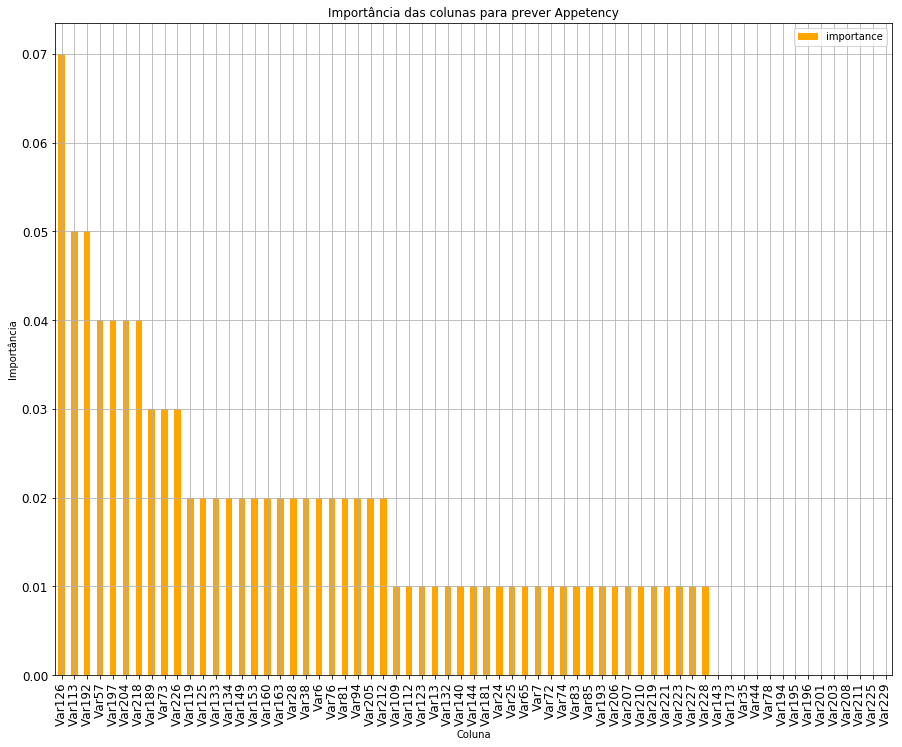

In [34]:
# Analisar a importancia de cada variável na decisao da arvore
importances = list(clf_rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(x_train.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
df_feature_importance = pd.DataFrame(feature_importances, columns=['feature', 'importance'])

ax = df_feature_importance.plot(kind='bar', 
        x='feature', 
        y='importance',
        figsize=(15,12),
        title= 'Importância das colunas para prever Appetency',
        grid=True,
        legend=True,
        fontsize = 12,                        
        color='orange',    
       );
# Set the x-axis label
ax.set_xlabel("Coluna")

# Set the y-axis label
ax.set_ylabel("Importância");

In [35]:
# ROC Curve Metrics
predictions_prob = clf_rf.predict_proba(x_test)[:, 1]
fpr2, tpr2, _ = roc_curve(y_test, predictions_prob, pos_label = 1)
auc_r = auc(fpr2, tpr2)
print("Valor AUC do modelo Appetency: {}".format(auc_r*100))

Valor AUC do modelo Appetency: 79.68666840456574


- Como pudemos ver os modelos sofreram Overfitting, isso pode estar relacionado ao fato da base de dados nao estar balanceada. Existem métodos para tentar contornar esse problema, como fazer oversampling, que é repertir a mesma entrada mais de uma vez, ou entao o undersamplig, que é tirar instancias da classe que possui um maior numero de ocorrencias.
- Para melhorar o modelo teria que passar por um processo de fine tunning, ou seja, testar o modelo em diferentes configuraçoes até encontrar o melhor resultado. Esse processo de ajuste dos parametros é muitas vezes acerto e erro, portanto pode ser bastante demorado
- Por a base de dados estar desbalanceada tive baixa precisao nos modelos em uma primeira tentativa, o que foi contornado usando class_weight="balanced". Assim o peso de errar para uma classe menos favorecida é muito maior.
- Link apresentando o desafio da KDD Cup 2009:
http://www.kdd.org/kdd-cup/view/kdd-cup-2009/Intro
